# Analysis

In [3]:
DATA_FOLDER = './data/dataset'
DATA_RESULTS_FOLDER = './data/results'

In [7]:
import pandas as pd
import os
df_first_exp = pd.read_csv(os.path.join(DATA_RESULTS_FOLDER, '2025-07-28_18-57-49/benchmark_log.csv'))
df_second_exp = pd.read_csv(os.path.join(DATA_RESULTS_FOLDER, '2025-07-28_19-14-20/benchmark_log.csv'))
df_exp = pd.concat([df_first_exp, df_second_exp], ignore_index=True)
df_exp


model_name                                              image  \
0     fluxcontrolbeta  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
1     fluxcontrolbeta  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
2     fluxcontrolbeta  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
3     fluxcontrolbeta  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
4     fluxcontrolbeta  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
5   stablediffusionv2  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
6   stablediffusionv2  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
7   stablediffusionv2  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
8   stablediffusionv2  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
9   stablediffusionv2  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
10          kandinsky  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
11          kandinsky  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
12          kandinsky  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
13          kandinsky  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
14          kandinsky  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
15    stablediffusion  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
16    stablediffusion  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
17    stablediffusion  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
18    stablediffusion  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
19    stablediffusion  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
20  stablediffusionxl  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
21  stablediffusionxl  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
22  stablediffusionxl  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
23  stablediffusionxl  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
24  stablediffusionxl  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
25     fluxkontextdev  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
26     fluxkontextdev  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
27     fluxkontextdev  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
28     fluxkontextdev  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   
29     fluxkontextdev  /fsx/jdelavande/inpaint-benchmark-suite/1_inpa...   

                                         prompt  \
0                    add a dog lying on the bed   
1              add a pie on the kitchen counter   
2              add a person sitting on the sofa   
3         remove the front chair from the scene   
4   put some clothes inside the washing machine   
5                    add a dog lying on the bed   
6              add a pie on the kitchen counter   
7              add a person sitting on the sofa   
8         remove the front chair from the scene   
9   put some clothes inside the washing machine   
10                   add a dog lying on the bed   
11             add a pie on the kitchen counter   
12             add a person sitting on the sofa   
13        remove the front chair from the scene   
14  put some clothes inside the washing machine   
15                   add a dog lying on the bed   
16             add a pie on the kitchen counter   
17             add a person sitting on the sofa   
18        remove the front chair from the scene   
19  put some clothes inside the washing machine   
20                   add a dog lying on the bed   
21             add a pie on the kitchen counter   
22             add a person sitting on the sofa   
23        remove the front chair from the scene   
24  put some clothes inside the washing machine   
25                   add a dog lying on the bed   
26             add a pie on the kitchen counter   
27             add a person sitting on the sofa   
28        remove the front chair from the scene   
29  put some clothes inside the washing machine   

                                      image_generated  duration_sec  \
0

/tmp/ipykernel_4164283/969917308.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(df_grouped['model_name'], rotation=45, ha='right')
/tmp/ipykernel_4164283/969917308.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_grouped['model_name'], rotation=45, ha='right')


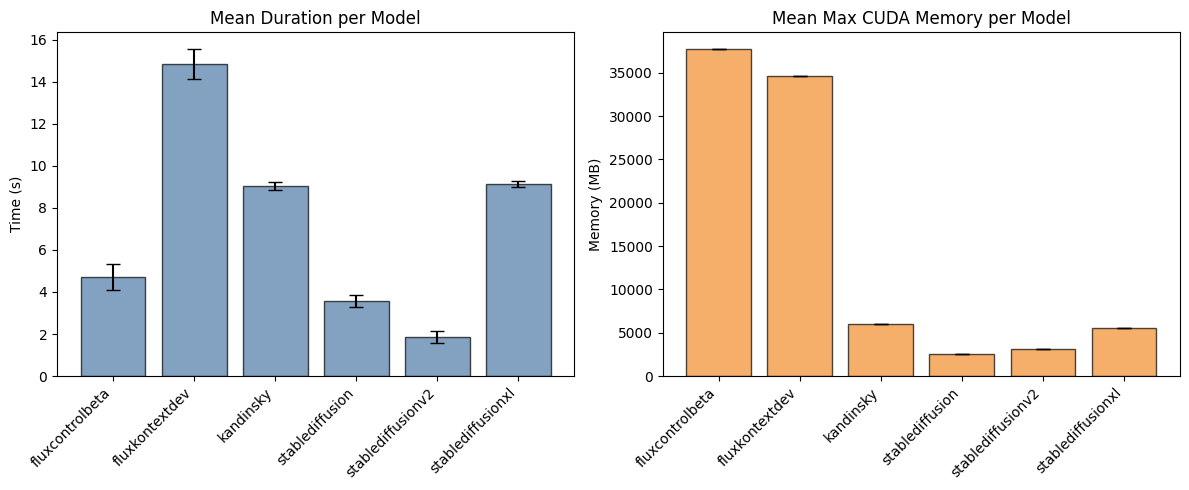

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcul des moyennes et des écarts-types
df_grouped = df_exp.groupby('model_name').agg({
    'duration_sec': ['mean', 'std'],
    'memory_MB': ['mean', 'std']
}).reset_index()

# Aplatir les colonnes multi-index
df_grouped.columns = ['model_name', 'duration_mean', 'duration_std', 'memory_mean', 'memory_std']

# Création des subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Durée moyenne avec barres d’erreur
axs[0].bar(df_grouped['model_name'], df_grouped['duration_mean'],
           yerr=df_grouped['duration_std'],
           alpha=0.7, edgecolor='black', color='#4E79A7', capsize=5)
axs[0].set_title('Mean Duration per Model')
axs[0].set_ylabel('Time (s)')
axs[0].set_xticklabels(df_grouped['model_name'], rotation=45, ha='right')

# Mémoire moyenne avec barres d’erreur
axs[1].bar(df_grouped['model_name'], df_grouped['memory_mean'],
           yerr=df_grouped['memory_std'],
           alpha=0.7, edgecolor='black', color='#F28E2B', capsize=5)
axs[1].set_title('Mean Max CUDA Memory per Model')
axs[1].set_ylabel('Memory (MB)')
axs[1].set_xticklabels(df_grouped['model_name'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


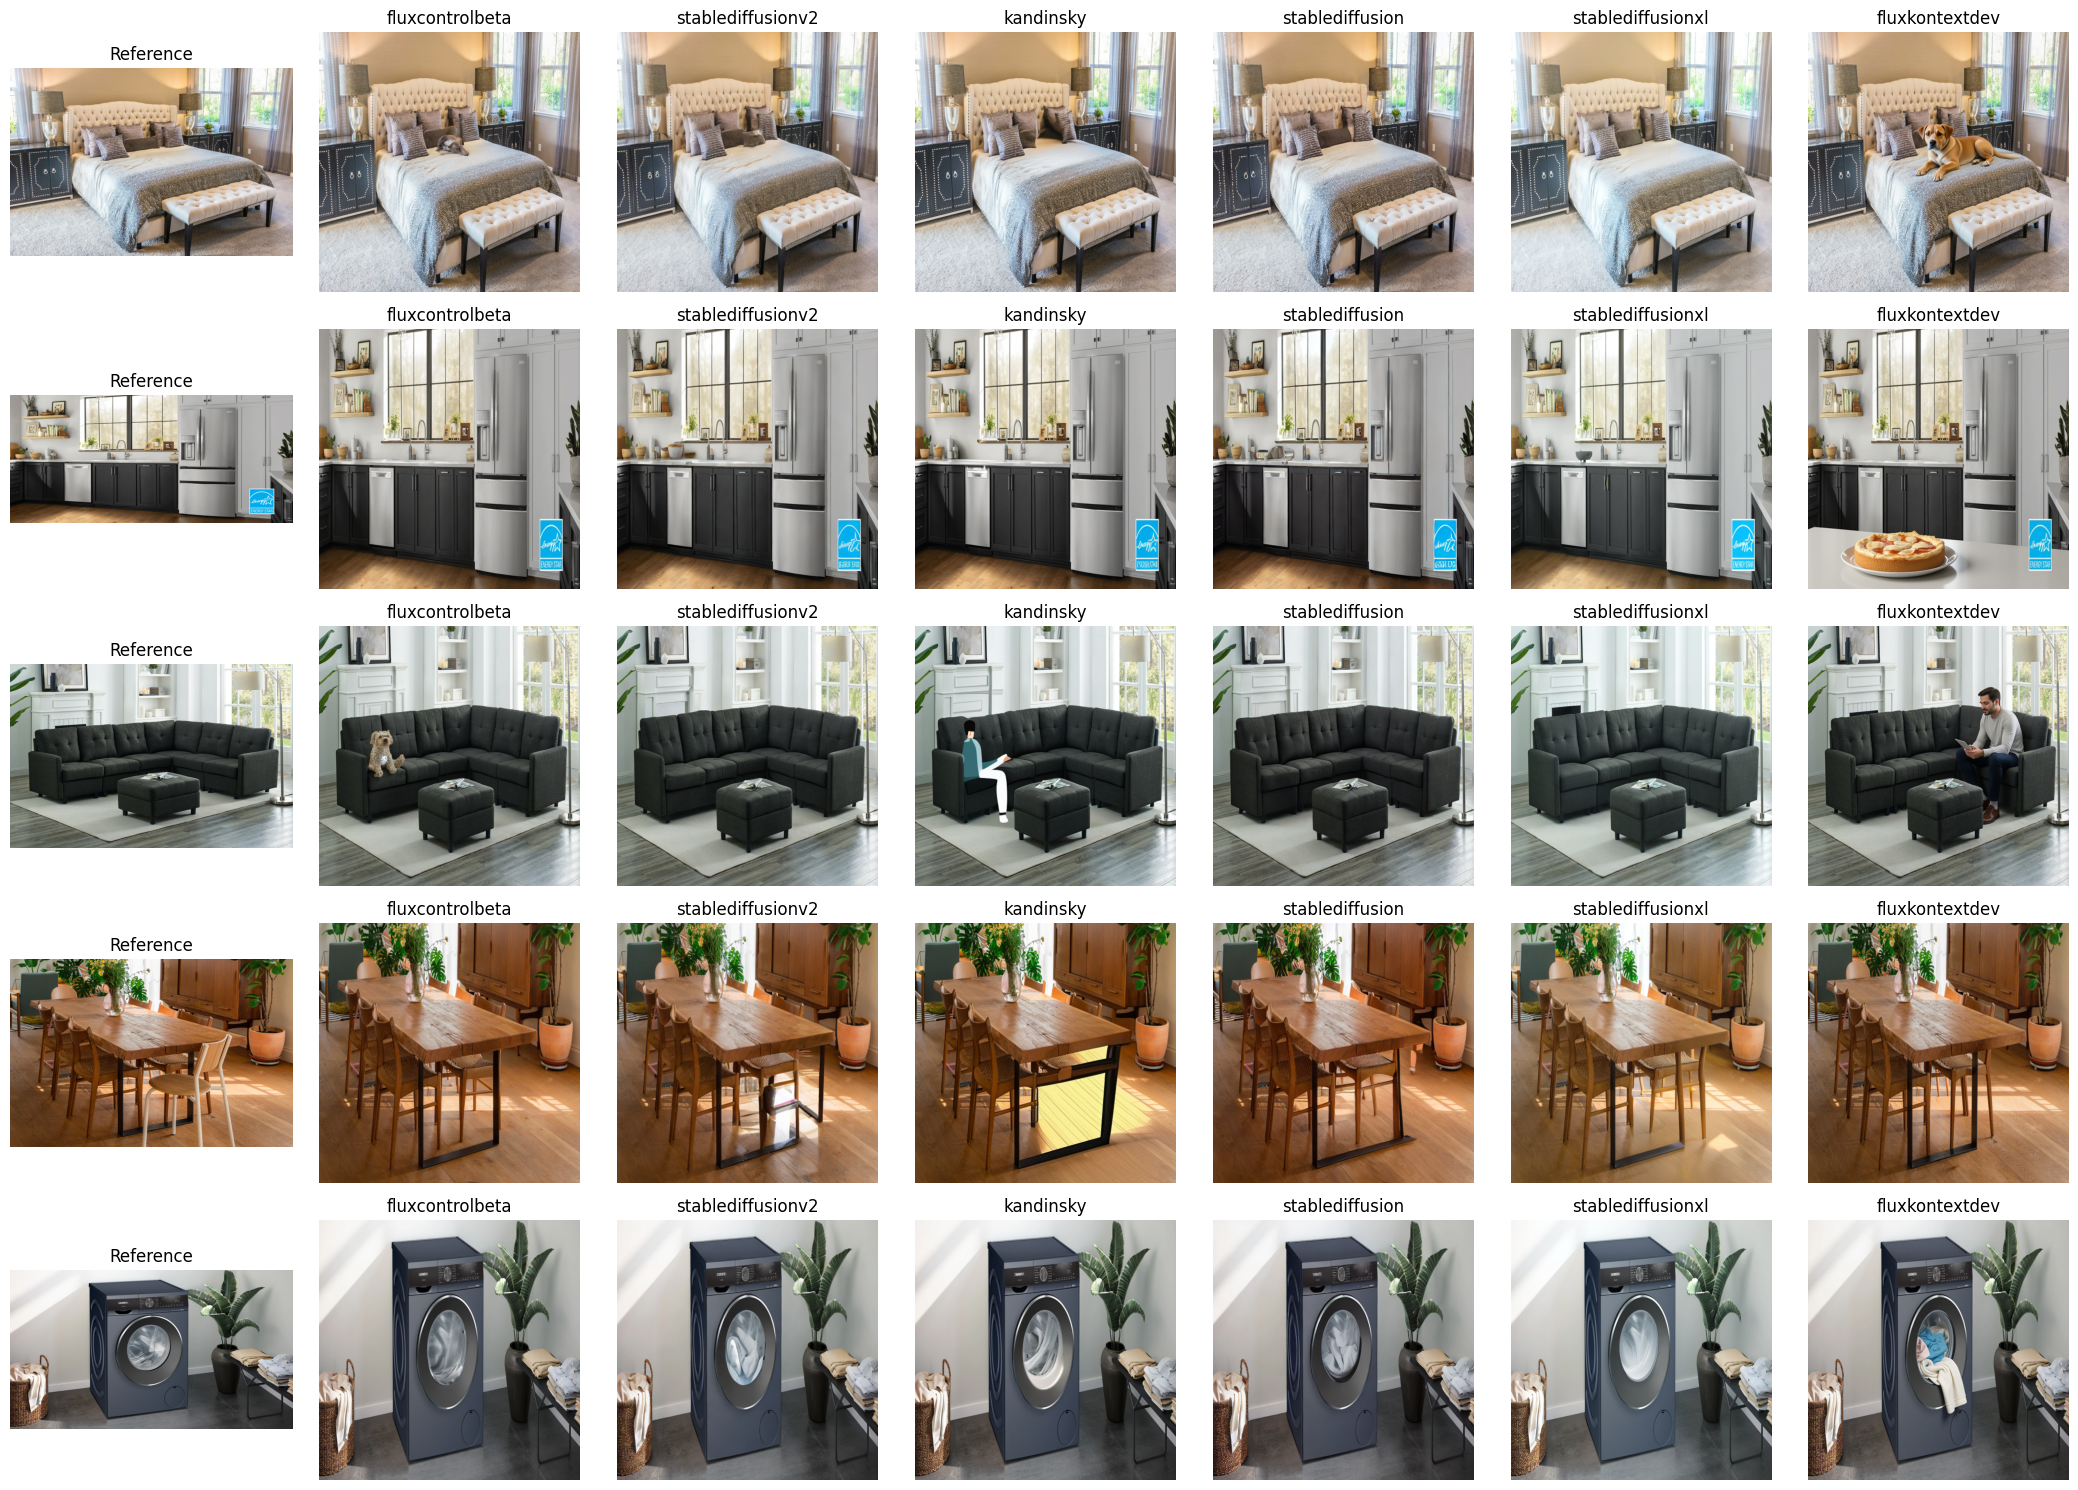

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# S'assurer que les images sont bien dans le bon format
def load_img(img):
    if isinstance(img, str):
        return Image.open(img).convert("RGB")
    return img

# Récupération des noms de modèles dans l’ordre
models = df_exp['model_name'].unique()
images = df_exp['image'].unique()

n_rows = len(images)
n_cols = len(models) + 1  # 1 pour l'image de référence

fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

for i, image_path in enumerate(images):
    # Image de référence à gauche
    ref_img = load_img(image_path)
    axs[i, 0].imshow(ref_img)
    axs[i, 0].set_title("Reference")
    axs[i, 0].axis('off')

    # Générés par chaque modèle
    for j, model in enumerate(models):
        row = df_exp[(df_exp['model_name'] == model) & (df_exp['image'] == image_path)]
        if not row.empty:
            gen_img = load_img(row.iloc[0]['image_generated'])
            axs[i, j+1].imshow(gen_img)
            axs[i, j+1].set_title(model)
            axs[i, j+1].axis('off')
        else:
            axs[i, j+1].axis('off')
            axs[i, j+1].set_title(model + "\n(Missing)")

plt.tight_layout()
plt.show()
